In [2]:
import os
import numpy as np
import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Dataset directory and class names
dataset_dir = "/content/drive/MyDrive/Projects/MajorProject/New_major"
class_names = ['a_Good', 'b_Moderate', 'c_Unhealthy_for_Sensitive_Groups', 'd_Unhealthy', 'e_Very_Unhealthy', 'f_Severe']

# Class name to label mapping
class_map = {class_name: idx for idx, class_name in enumerate(class_names)}

# List to store images and labels
images = []
labels = []

# Maximum number of images to load per class
max_images_per_class = 500

# Load images and labels
for class_name in class_names:
    class_folder = os.path.join(dataset_dir, class_name)
    counter = 0
    for filename in os.listdir(class_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(class_folder, filename)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(class_map[class_name])
            counter += 1
            if counter >= max_images_per_class:
                break

# Convert images and labels to numpy arrays
images = np.array(images, dtype=np.float32) / 255.0  # Normalize images
labels = np.array(labels, dtype=np.int32)
labels = to_categorical(labels, num_classes=len(class_names))  # One-hot encode labels

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (2100, 224, 224, 3), Validation shape: (450, 224, 224, 3), Test shape: (450, 224, 224, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN + LSTM Model
model = Sequential()

# Add convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the CNN output
model.add(Flatten())

# Add Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Reshape the output to make it compatible with the LSTM layer
model.add(Reshape((1, 256)))  # Reshaping to 3D: (batch_size, timesteps, features)

# LSTM layer
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=8
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get training and validation losses and accuracies of the last epoch
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.1821 - loss: 1.7869 - val_accuracy: 0.3933 - val_loss: 1.6899
Epoch 2/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.3270 - loss: 1.6553 - val_accuracy: 0.4889 - val_loss: 1.3783
Epoch 3/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4559 - loss: 1.4605 - val_accuracy: 0.5644 - val_loss: 1.1269
Epoch 4/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5205 - loss: 1.2820 - val_accuracy: 0.6800 - val_loss: 0.9286
Epoch 5/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5879 - loss: 1.1191 - val_accuracy: 0.7422 - val_loss: 0.8049
Epoch 6/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6509 - loss: 0.9947 - val_accuracy: 0.7356 - val_loss: 0.7233
Epoch 7/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.6815 - loss: 0.9327 - val_accuracy: 0.7444 - val_loss: 0.6565
Epoch 8/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.6967 - loss: 0.8784 - val_accuracy: 0.8178 - val_l

In [6]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
# Get predictions for training, validation, and test sets
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# Convert true labels to categorical
y_train_true = np.argmax(y_train, axis=1)
y_val_true = np.argmax(y_val, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train_true, y_train_pred, target_names=class_names))

print("Validation Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=class_names))

print("Test Classification Report:")
print(classification_report(y_test_true, y_test_pred, target_names=class_names))

# Calculate precision, recall, and F1-score for training, validation, and testing
train_metrics = precision_recall_fscore_support(y_train_true, y_train_pred, average='weighted')
val_metrics = precision_recall_fscore_support(y_val_true, y_val_pred, average='weighted')
test_metrics = precision_recall_fscore_support(y_test_true, y_test_pred, average='weighted')

print(f"Training Precision: {train_metrics[0]:.2f}, Recall: {train_metrics[1]:.2f}, F1-Score: {train_metrics[2]:.2f}")
print(f"Validation Precision: {val_metrics[0]:.2f}, Recall: {val_metrics[1]:.2f}, F1-Score: {val_metrics[2]:.2f}")
print(f"Test Precision: {test_metrics[0]:.2f}, Recall: {test_metrics[1]:.2f}, F1-Score: {test_metrics[2]:.2f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Training Classification Report:
                                  precision    recall  f1-score   support

                          a_Good       0.85      0.84      0.85       338
                      b_Moderate       0.78      0.72      0.75       349
c_Unhealthy_for_Sensitive_Groups       0.76      0.67      0.71       352
                     d_Unhealthy       0.72      0.76      0.74       357
                e_Very_Unhealthy       0.88      0.92      0.90       359
                        f_Severe       0.88      0.97      0.92       345

                        accuracy                           0.81      2100
                       macro avg       0.81      0.81      0.81      2100
                    weighted avg       0.81      0.81      0.81      2100

Validation Classification Report:
                                  precision    recall  f1-score   suppo

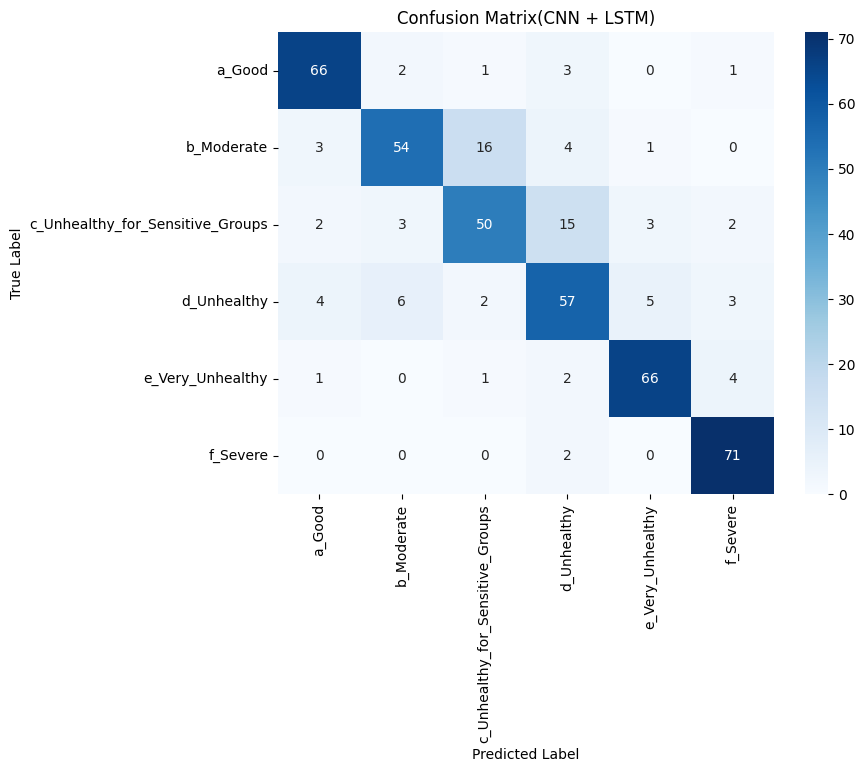

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix(CNN + LSTM)")
plt.show()


In [8]:
# import os
# from PIL import Image
# from IPython.display import display  # For displaying images in Colab

# # Specify the folder path where your images are stored
# folder_path = "/content/drive/MyDrive/Projects/MajorProject/Train_images"

# # Get all image file paths from the folder (ensure you have exactly 9 images)
# image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# # Check if there are exactly 9 images
# if len(image_files) != 9:
#     raise ValueError("The folder must contain exactly 9 images.")

# # Resize all images to 73x73
# resized_images = [Image.open(img).resize((73, 73)) for img in image_files]

# # Create a blank canvas (224x224) with a white background
# canvas = Image.new("RGB", (224, 224), "white")

# # Paste images into the canvas with 1-pixel gaps
# index = 0
# for row in range(3):
#     for col in range(3):
#         x = col * 74 + 1  # Starting x-coordinate (1-pixel gap included)
#         y = row * 74 + 1  # Starting y-coordinate (1-pixel gap included)
#         canvas.paste(resized_images[index], (x, y))
#         index += 1

# # Display the final image in Colab
# display(canvas)
